# Exploratory Analysis of TDA Results

## Load packages.

In [11]:
require(data.table)
require(magrittr)
require(rpart)

require(ggplot2)
require(GGally)

Loading required package: GGally
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


## Read data.

In [39]:
z <- NULL
for (i in c("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15",
            "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31",
            "32", "33", "34", "35", "36", "37", "38"))
    z <- rbind(z, fread(paste(i, "Line-results.tsv", sep="/")))
z %>% dim

[1] 28558    22

In [40]:
z %>% summary

      Case            Outage Count   Outage Fraction       Outages         
 Min.   :100000000   Min.   :0.000   Min.   :0.0000000   Length:28558      
 1st Qu.:112000316   1st Qu.:1.000   1st Qu.:0.0004264   Class :character  
 Median :124000026   Median :1.000   Median :0.0004264   Mode  :character  
 Mean   :122121470   Mean   :1.068   Mean   :0.0004555                     
 3rd Qu.:133000310   3rd Qu.:1.000   3rd Qu.:0.0004264                     
 Max.   :138001240   Max.   :2.000   Max.   :0.0008529                     
   Served MW      Unserved MW       Unserved Fraction   Reactance Loss pu
 Min.   :67091   Min.   : 0.00000   Min.   :0.000e+00   Min.   :0.00000  
 1st Qu.:67109   1st Qu.: 0.00000   1st Qu.:0.000e+00   1st Qu.:0.01507  
 Median :67109   Median : 0.00000   Median :0.000e+00   Median :0.02891  
 Mean   :67109   Mean   : 0.03617   Mean   :5.389e-07   Mean   :0.04307  
 3rd Qu.:67109   3rd Qu.: 0.00000   3rd Qu.:0.000e+00   3rd Qu.:0.05432  
 Max.   :67109   Max.   

## Pairs plot.

Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message:
"Removed 1 rows containing missing values (geom_text)."Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message:
"Removed 1 rows containing missing values (geom_text)."Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message:
"Removed 1 rows containing missing values (geom_text)."Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message:
"Removed 1 rows containing missing values (geom_text)."Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message in cor(x, y, method = method, use = use):
"the standard deviation is zero"Warning message:
"Removed 1 rows containing missing values (geom_text)."Warning me

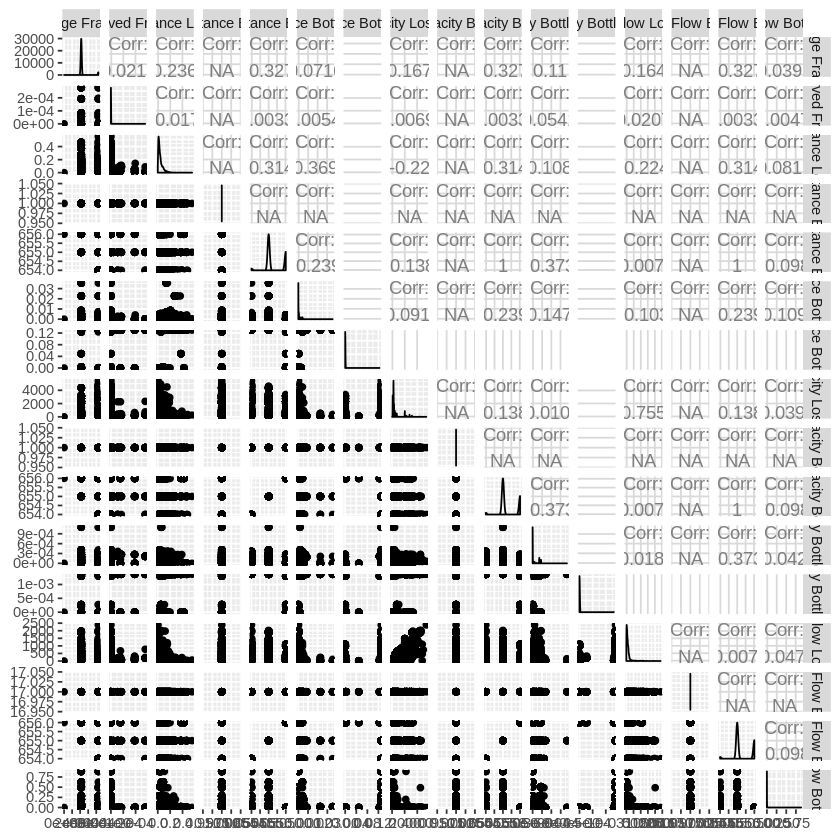

In [44]:
ggpairs(z, c(3, 7:21))

## Simple CART.

### Add a binary column indicating whether load was lost.

In [36]:
z[, `Outage?` := `Unserved MW` > 0]

### Classification tree.

In [47]:
z.rpart <- rpart(
    `Outage?` ~ `Outage Fraction` +
#       `Reactance Loss pu` +
        `Reactance Betti 0` + `Reactance Betti 1` + `Reactance Bottleneck 0` + `Reactance Bottleneck 1` +
#       `Capacity Loss MW`  +
        `Capacity Betti 0`  + `Capacity Betti 1`  + `Capacity Bottleneck 0`  + `Capacity Bottleneck 1`  +
#       `Base Flow Loss MW` +
        `Base Flow Betti 0` + `Base Flow Betti 1` + `Base FLow Bottleneck 0` + `Base FLow Bottleneck 1` ,
    data = z
)
z.rpart

ERROR: Error in eval(predvars, data, env): object 'Outage?' not found


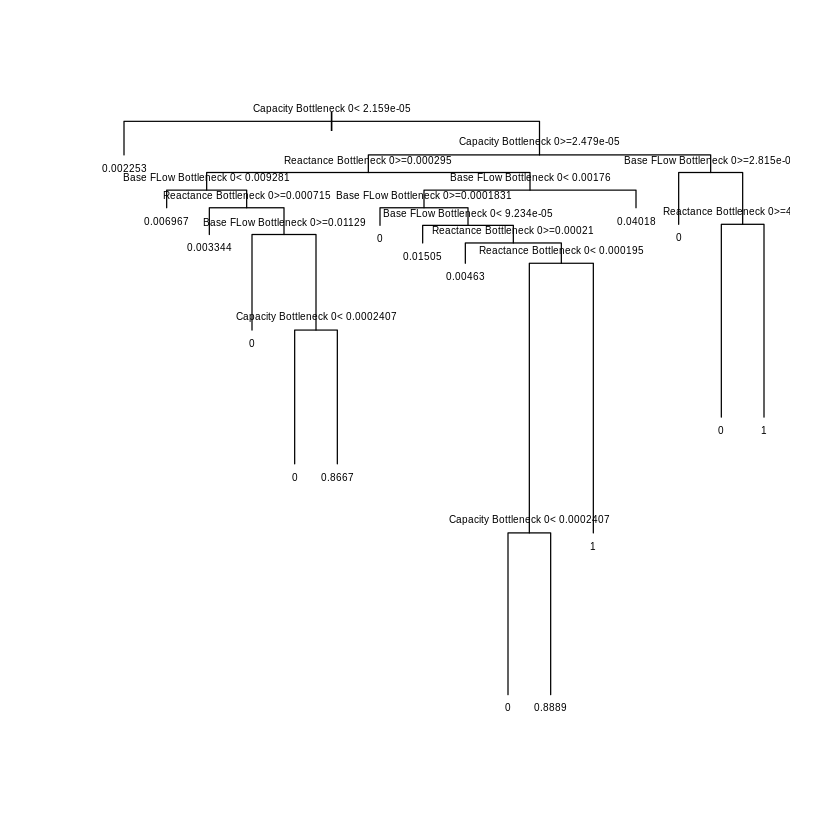

In [48]:
plot(z.rpart)
text(z.rpart, cex=0.5)

### Regression tree.

In [49]:
z.rpart <- rpart(
    `Unserved Fraction` ~ `Outage Fraction` +
#       `Reactance Loss pu` +
        `Reactance Betti 0` + `Reactance Betti 1` + `Reactance Bottleneck 0` + `Reactance Bottleneck 1` +
#       `Capacity Loss MW`  +
        `Capacity Betti 0`  + `Capacity Betti 1`  + `Capacity Bottleneck 0`  + `Capacity Bottleneck 1`  +
#       `Base Flow Loss MW` +
        `Base Flow Betti 0` + `Base Flow Betti 1` + `Base FLow Bottleneck 0` + `Base FLow Bottleneck 1` ,
    data = z,
    method = "anova"
)
z.rpart

n= 28558 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 28558 2.851551e-06 5.388942e-07  
    2) Capacity Bottleneck 0< 0.0002000764 23351 9.722679e-07 2.556080e-07 *
    3) Capacity Bottleneck 0>=0.0002000764 5207 1.869005e-06 1.809302e-06  
      6) Reactance Bottleneck 0>=0.000295 2722 1.150616e-07 4.910056e-07 *
      7) Reactance Bottleneck 0< 0.000295 2485 1.744031e-06 3.253328e-06  
       14) Reactance Bottleneck 0< 0.000285 1917 3.339159e-07 1.204243e-06  
         28) Capacity Bottleneck 0< 0.0002540184 1386 6.349377e-31 2.082669e-18 *
         29) Capacity Bottleneck 0>=0.0002540184 531 3.266595e-07 4.347523e-06  
           58) Base FLow Bottleneck 0>=0.0001830519 398 4.146010e-08 1.948821e-06 *
           59) Base FLow Bottleneck 0< 0.0001830519 133 2.760566e-07 1.152559e-05  
            118) Base FLow Bottleneck 0< 0.0001520033 106 0.000000e+00 0.000000e+00 *
            119) Base FLow Bottleneck 0>=0.0001520033 27 2.066948e-07 5.677421e-05  


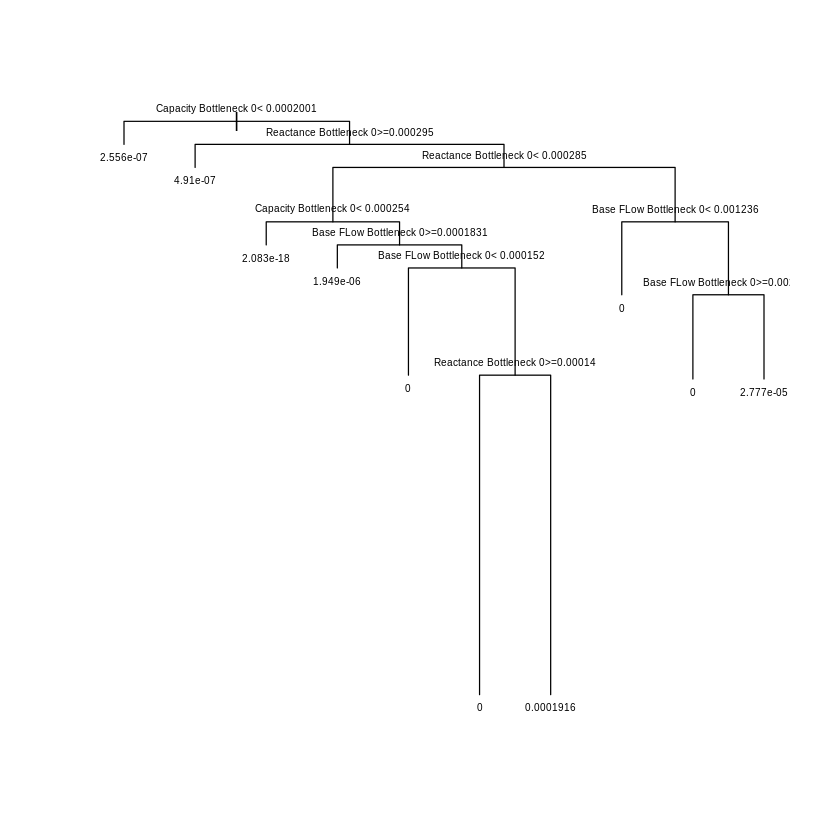

In [50]:
plot(z.rpart)
text(z.rpart, cex=0.5)